# Parkinson disease Predictive model using Machine Learning algorithms

The data has been downloaded from UCI Machine Learning repository. It is numerical data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

In [3]:
data=pd.read_csv(url)
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# 0. Atrribute Information
name - ASCII subject name and recording number\
MDVP:Fo(Hz) - Average vocal fundamental frequency\
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency\
MDVP:Flo(Hz) - Minimum vocal fundamental frequency\
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency\
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude\
NHR,HNR - Two measures of ratio of noise to tonal components in the voice\
status - Health status of the subject (one) - Parkinson's, (zero) - healthy\
RPDE,D2 - Two nonlinear dynamical complexity measures\
DFA - Signal fractal scaling exponent\
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation\

# 1. Data Processing

In [4]:
data.shape

(195, 24)

In [5]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

The unwanted columns has been removed from the dataset.

In [6]:
data=data.drop(columns=['name'], axis=1)
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### 1.1 Seperation of dependenet variable and independenet variables

In [7]:
data_X=data.drop(columns=['status'], axis=1)
data_X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [8]:
data_y=data['status']
data_y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [9]:
data_y.value_counts()

1    147
0     48
Name: status, dtype: int64

### 1.2 Detecting outliers

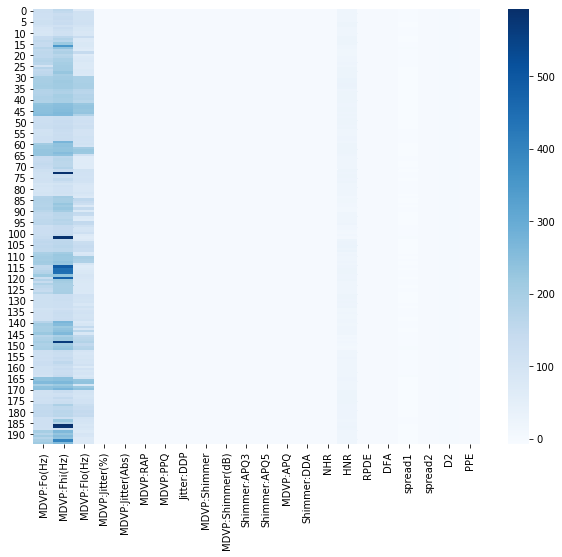

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data_X, cmap='Blues')

### 1.3 Remove outliers and normalize the data to scale

C:\Users\INNER\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Users\INNER\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


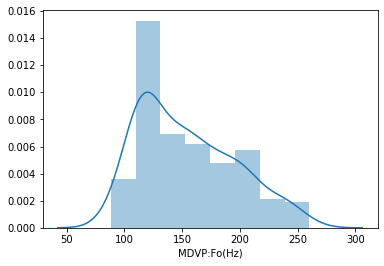

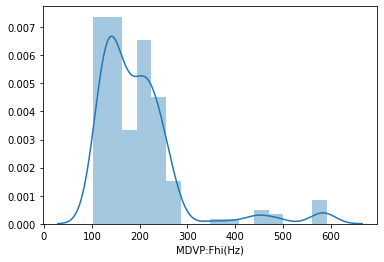

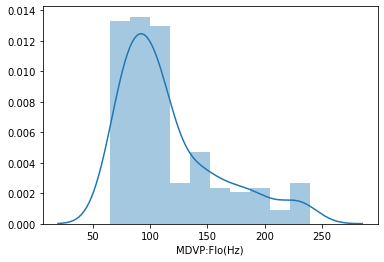

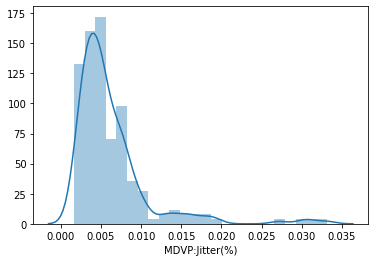

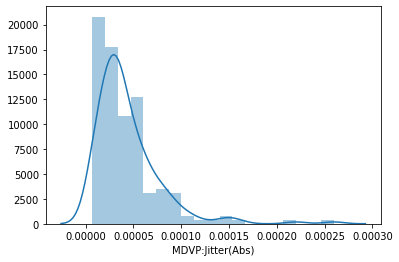

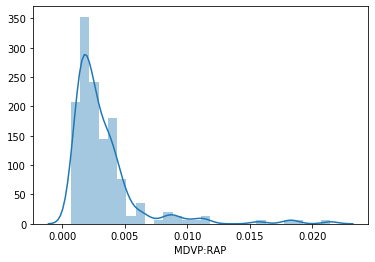

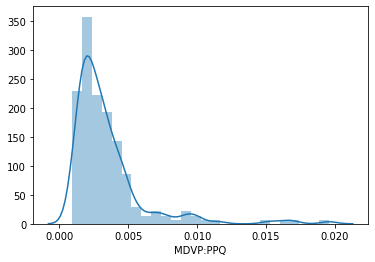

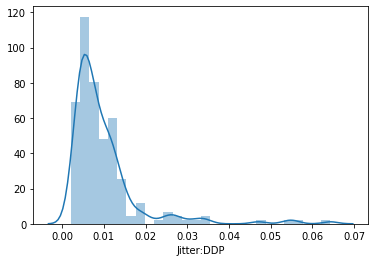

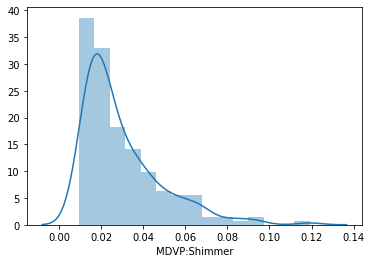

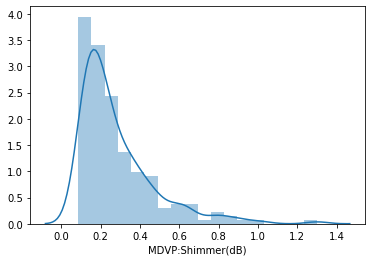

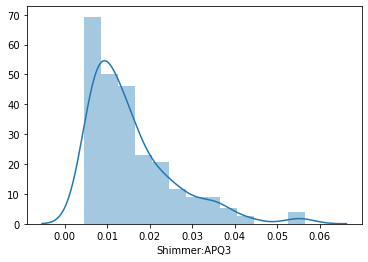

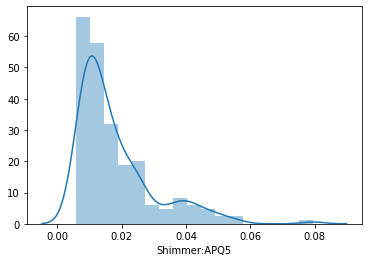

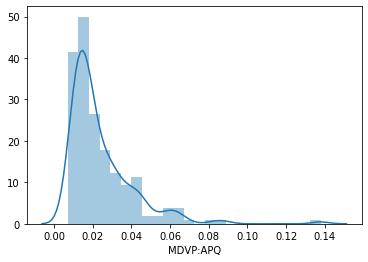

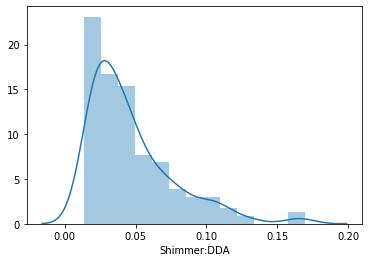

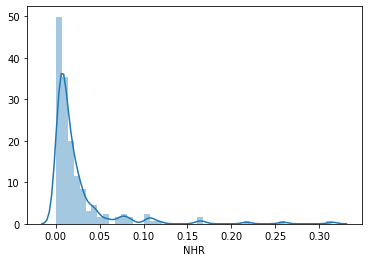

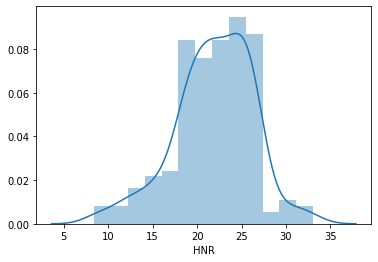

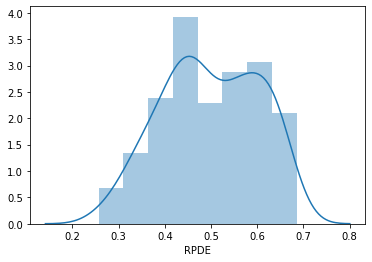

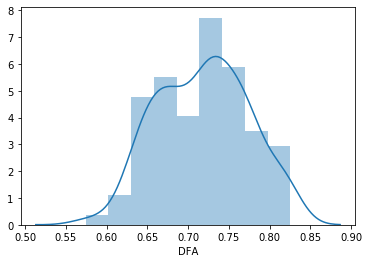

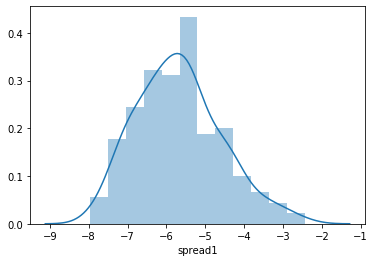

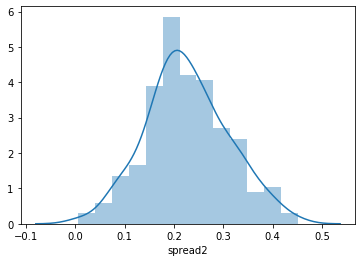

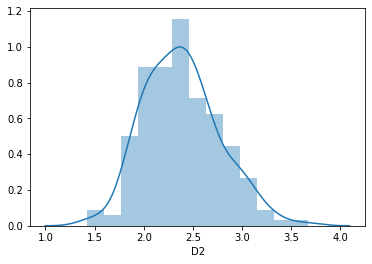

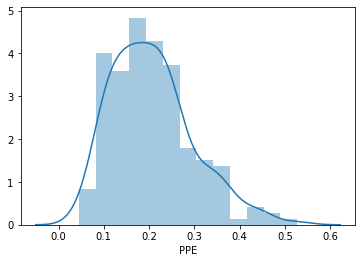

In [11]:
import matplotlib.pyplot as plt
data_dist=data.drop(['status'], axis=1)

for i, col in enumerate(data_dist.columns):
    plt.figure(i)
    sns.distplot(data_dist[col])

We use MinMaxScaler method to scale the features between -1 and 1. Follwing the scaling, fit_transorm method is used to remove outliers if any.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((-1,1))

x=scaler.fit_transform(data_X)
y=data_y

In [13]:
x_trans=pd.DataFrame(x)
x_trans

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.631383,-0.774817,-0.890370,-0.608640,-0.501976,-0.709056,-0.504823,-0.709424,-0.375571,-0.439606,...,-0.655104,-0.334831,-0.863386,0.023490,-0.261689,0.920297,0.139750,0.171530,-0.218677,-0.005381
1,-0.603346,-0.810139,-0.443354,-0.491741,-0.422925,-0.617534,-0.352626,-0.617916,-0.054227,-0.110929,...,-0.441152,0.032097,-0.881338,-0.134845,-0.058339,0.954049,0.406554,0.482674,-0.053710,0.342652
2,-0.669923,-0.881744,-0.469423,-0.439644,-0.343874,-0.541426,-0.261522,-0.541178,-0.218733,-0.347576,...,-0.560303,-0.113365,-0.920807,-0.007559,-0.191168,1.000000,0.273489,0.372742,-0.182361,0.193365
3,-0.669993,-0.854145,-0.471599,-0.473316,-0.343874,-0.581888,-0.350482,-0.582276,-0.171444,-0.290058,...,-0.532430,-0.049044,-0.918006,-0.008128,-0.167490,0.951770,0.391255,0.476177,-0.126046,0.343899
4,-0.677701,-0.838182,-0.479786,-0.290978,-0.185771,-0.434489,-0.125402,-0.434259,-0.001095,-0.179951,...,-0.426296,0.169085,-0.891651,-0.089003,-0.249682,0.985626,0.524944,0.027597,-0.191329,0.515223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.000361,-0.474028,-0.668555,-0.815121,-0.818182,-0.812139,-0.821008,-0.811848,-0.427972,-0.474117,...,-0.689716,-0.275388,-0.828182,-0.099732,-0.104631,-0.333745,-0.484213,-0.479185,0.098097,-0.633364
191,0.410975,-0.384051,-0.723514,-0.748412,-0.818182,-0.746628,-0.785638,-0.746348,-0.671901,-0.707477,...,-0.822345,-0.557324,-0.888914,-0.129806,-0.182866,-0.131798,-0.360089,-0.446089,0.210947,-0.484885
192,0.005461,-0.437174,-0.898546,-0.242694,-0.422925,-0.464355,-0.494105,-0.464119,-0.752784,-0.718981,...,-0.854813,-0.686738,-0.322023,-0.232545,-0.295363,-0.351402,-0.574111,-0.314847,0.117935,-0.638840
193,0.285786,0.203613,-0.891441,-0.636595,-0.739130,-0.709056,-0.680600,-0.709424,-0.754975,-0.743632,...,-0.866912,-0.688022,-0.544323,-0.140128,-0.091649,-0.444842,-0.558699,-0.094231,-0.363556,-0.673726


# 2. Model building
### 2.1 Support Vector Machine

In [14]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_x,test_x,train_y,test_y=train_test_split(x, y, test_size=0.3, random_state=0)

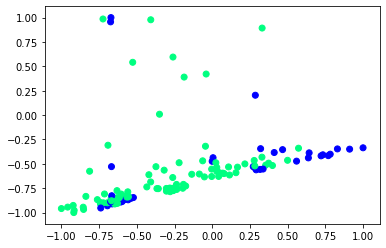

In [15]:
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, cmap='winter')

In [16]:
from sklearn import svm

model = svm.SVC(kernel='linear')
model=model.fit(train_x, train_y)

In [17]:
prediction_y=model.predict(test_x)
prediction_y, test_y.array

(array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64),
 <PandasArray>
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
  1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
  0, 1, 1, 1, 1, 1, 1]
 Length: 59, dtype: int64)

#### 2.1.1 Accuracy and prediction

In [18]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_y, prediction_y)*100, '%')
print("Precision:",metrics.precision_score(test_y, prediction_y)*100, '%')

Accuracy: 88.13559322033898 %
Precision: 91.48936170212765 %


In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, prediction_y)

array([[ 9,  4],
       [ 3, 43]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test_y,prediction_y, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.75      0.69      0.72        13
     class 1       0.91      0.93      0.92        46

    accuracy                           0.88        59
   macro avg       0.83      0.81      0.82        59
weighted avg       0.88      0.88      0.88        59



### 2.2 Decision Tree

In [21]:
from sklearn import tree

model_tree=tree.DecisionTreeClassifier()

In [22]:
decision_tree=model.fit(train_x, train_y)

In [23]:
predict_decisiontree=decision_tree.predict(test_x)
predict_decisiontree, test_y.array

(array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64),
 <PandasArray>
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
  1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
  0, 1, 1, 1, 1, 1, 1]
 Length: 59, dtype: int64)

#### 2.2.1 Accuracy of Decision Tree

In [24]:
print("Accuracy:",metrics.accuracy_score(test_y, predict_decisiontree)*100, '%')
print("Precision:",metrics.precision_score(test_y, predict_decisiontree)*100, '%')

Accuracy: 88.13559322033898 %
Precision: 91.48936170212765 %


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, predict_decisiontree)

array([[ 9,  4],
       [ 3, 43]], dtype=int64)

### 2.3 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR=LogisticRegression()
model_LR=LR.fit(train_x, train_y)

prediction_LR=model_LR.predict(test_x)
prediction_LR, test_y.array

(array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64),
 <PandasArray>
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
  1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
  0, 1, 1, 1, 1, 1, 1]
 Length: 59, dtype: int64)

####  2.3.1 Accuracy test of Logistic Regression

In [28]:
print("Accuracy:",metrics.accuracy_score(test_y, prediction_LR)*100, '%')
print("Precision:",metrics.precision_score(test_y, prediction_LR)*100, '%')

Accuracy: 89.83050847457628 %
Precision: 91.66666666666666 %


In [29]:
confusion_matrix(test_y, prediction_LR)

array([[ 9,  4],
       [ 2, 44]], dtype=int64)

# 3. Pipelines

Instead of going step by step traditional way,by applying pipeline is much easier to avoid monotonous steps. Along with above algorithms, few other classifier algorithms are clubbed in the pipelining process.

To make the pipeline much lighter, dimensions are being reduced by using PCA. However it has been expecting that some of the data will be loosing. 

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

### 3.1 Creating the pipeline

In [31]:
pipe_lr=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=7)),
                 ('clf',LogisticRegression(random_state=0))])



pipe_svm=Pipeline([('scl',StandardScaler()),
                  ('pca',PCA(n_components=7)),
                  ('clf',svm.SVC(random_state=0))])




pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=7)),
                 ('clf',tree.DecisionTreeClassifier(random_state=0))])

pipe_adaboost=Pipeline([('scl',StandardScaler()),
                       ('pca',PCA(n_components=7)),
                       ('clf',AdaBoostClassifier())])

pipe_gradientboosting=Pipeline([('scl',StandardScaler()),
                       ('pca',PCA(n_components=7)),
                       ('clf',GradientBoostingClassifier(random_state=0))])

pipe_knn=Pipeline([('scl',StandardScaler()),
                  ('pca',PCA(n_components=7)),
                  ('clf',KNeighborsClassifier(n_neighbors=3))])

#### 3.1.1 List of pipe lines

In [32]:
pipelines=[pipe_lr,pipe_svm,pipe_dt,pipe_adaboost,pipe_gradientboosting,pipe_knn]

### 3.2 Fit the pipelines and accuracy comparision


During the loop, each classifier has been fitted with training data.

In [33]:
algos=['Logistic Regression','Support Vector Machine','Decision tree','AdaBoostClassifier','GradientBoosting','KNearestNeighbors']

for (pipe, i) in zip(pipelines,algos):
    pipe.fit(train_x,train_y)
    
    y_pred = pipe.predict(test_x)
    
    print('\033[1m'+'Results of:', i +'\033[0;0m')
    print('pipeline test accuracy: ',round((pipe.score(test_x,test_y)*100),2),'%')
    print('CONFUSION MATRIX: \n',confusion_matrix(test_y, y_pred))
    target_names = ['class 0', 'class 1']
    print(classification_report(test_y,y_pred, target_names=target_names))
    
    if i=='KNearestNeighbors':
        break
    print('---------------------------------------------------------------------')

Results of: Logistic Regression
pipeline test accuracy:  88.14 %
CONFUSION MATRIX: 
 [[10  3]
 [ 4 42]]
              precision    recall  f1-score   support

     class 0       0.71      0.77      0.74        13
     class 1       0.93      0.91      0.92        46

    accuracy                           0.88        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.89      0.88      0.88        59

---------------------------------------------------------------------
Results of: Support Vector Machine
pipeline test accuracy:  91.53 %
CONFUSION MATRIX: 
 [[ 8  5]
 [ 0 46]]
              precision    recall  f1-score   support

     class 0       1.00      0.62      0.76        13
     class 1       0.90      1.00      0.95        46

    accuracy                           0.92        59
   macro avg       0.95      0.81      0.86        59
weighted avg       0.92      0.92      0.91        59

-----------------------------------------------------------------

### 3.3 Find the Model with best Accuracy

In [34]:
pipe_dict={0:'LogisticRegression',1:'Support Vector Machine',2:'Decision tree',3:'AdaBoostClassifier',4:'GradientBoosting',5:'KNearestNeighbors'}

for idx,val in enumerate(pipelines):
    pipe_dict[idx],val.score(test_x,test_y)

In [35]:
best_acc=0.0
best_clf=0.0
best_pipe=''

for idx, val in enumerate(pipelines):
    if val.score(test_x,test_y)>best_acc:
        best_acc=val.score(test_x,test_y)
        best_pipe=val
        best_clf=idx
    
print('\033[1m'+'Classifier with best accuracy: %s'%pipe_dict[best_clf])

Classifier with best accuracy: GradientBoosting


After using bunch of algorithms, **GradientBoosting** toped the pipeline race. Hence it has been considered that the model associated with **GradientBoosting** is good one.

The range of model accuracies from all models is 10%, which signifies how the pipeline helps to distinguish performance.